In [1]:
from vdom.helpers import h1, p, img, div, b, li, ul, h2, h3, h4, h5, a
from IPython.display import display, HTML



In [2]:

with open ("custom.css", "r") as myfile:
    custom_css = myfile.read().replace('\n', '')

title = '<h1>Olympic Games Analysis</h1>'
indexes = ({1: {'name': {'Introduction'}},
            2: {'name': {'Requirements'}},
            3: {'name': {'Data Cleaning'}},
            4: {'name': {'Male Analysis'}},
            5: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            6: {'name': {'Female Analysis'}},
            7: {'name': {'Physique', 'Age', 'Winning Density based on physique'}},
            8: {'name': {'Gender Gap'}},
            9: {'name': {'Geographic Analysis'}},
            })
          
links =   ({1: {'link': {'#introduction'}},
            2: {'link': {'#requirements'}},
            3: {'link': {'#data_cleaning'}},
            4: {'link': {'#male_analysis'}},
            5: {'link': {'#physique_male', '#age_male', '#winning_male_density_physique'}},
            6: {'link': {'#female_analysis'}},
            7: {'link': {'#physique_female', '#age_female', '#winning_female_density_physique'}},
            8: {'link': {'#gender_gap'}},
            9: {'link': {'#geographic_analysis'}},
            })


def listIndex(indexes):
    html = custom_css
    html += title
    html += '<img src="img/olympics-animation.jpg">'
    html += '<ul class="unstyled">'
    
    for x in range(1, 9):
        try:
        
            index_len = len(indexes[x]['name'])
            if index_len > 1:
                html += '<ul>'
                pass
            for i, j in zip(indexes[x]['name'], links[x]['link']):
                html += '<li><a href="' + j + '">' + i + '</a></li>'
            if index_len > 1:
                html += '</ul>'
                pass
        except Exception:
            break
    html += '</ul>'
    
    return html

display(HTML(listIndex(indexes)))

<h1> Requirements </h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
%matplotlib inline

In [4]:

# Cumulative distribution function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    print(y)
    return x, y

# Calculate min and max of the data
def minmax(data):
    min_val = min(data)
    max_val = max(data)

    return (min_val, max_val)

# Calculate Variance and Standart Deviation
def varstd(data):
    variance = np.var(data)
    standart_dev = np.std(data)
    return (variance, standart_dev)

<h1>Each row represents an event by a particular athlete</h1>

In [5]:
csv_files = glob.glob('datasets/*.csv')
print(csv_files)
# Import the first dataset called "athlete_events.csv"
dataset = pd.read_csv(csv_files[0])
unclean_df = dataset
# Visualize a sample
dataset.sample(5)

['datasets\\athlete_events.csv', 'datasets\\noc_regions.csv']


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
98865,50038,Fanny Horta,F,30.0,166.0,63.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN
218845,109910,Zhanna Gennadyevna Shitik-Shepelevich,F,37.0,164.0,63.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Shooting,"Shooting Women's Air Pistol, 10 metres",NaN
192726,96762,Francisco Prat Domenech,M,20.0,162.0,54.0,Spain,ESP,1964 Winter,1964,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
238724,119672,Jesse David Thielke,M,24.0,170.0,68.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Featherweight, Greco-Roman",NaN
118096,59750,"John ""Jack"" Kilpatrick",M,18.0,178.0,71.0,Great Britain,GBR,1936 Winter,1936,Winter,Garmisch-Partenkirchen,Ice Hockey,Ice Hockey Men's Ice Hockey,Gold


<h1>Stuff to know about the "athlete_events.csv" Dataset</h1>
<h3><b>Content</b></h3>
<p>The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:</p>
<p><b>ID</b> - Unique number for each athlete</p>
<p><b>Name</b> - Athlete's name</p>
<p><b>Sex</b> - M or F</p>
<p><b>Age</b> - Integer</p>
<p><b>Height</b> - In centimeters</p>
<p><b>Weight</b> - In kilograms</p>
<p><b>Team</b> - Team name</p>
<p><b>NOC</b> - National Olympic Committee 3-letter code</p>
<p><b>Games</b> - Year and season</p>
<p><b>Year</b> - Integer</p>
<p><b>Season</b> - Summer or Winter</p>
<p><b>City</b> - Host city</p>
<p><b>Sport</b> - Sport</p>
<p><b>Event</b> - Event</p>
<p><b>Medal</b> - Gold, Silver, Bronze, or NA</p>

<h1>Data types and attributes </h1>

In [6]:
dataset.columns = dataset.columns.str.lower()
print(dataset.info())
print(dataset.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
id        271116 non-null int64
name      271116 non-null object
sex       271116 non-null object
age       261642 non-null float64
height    210945 non-null float64
weight    208241 non-null float64
team      271116 non-null object
noc       271116 non-null object
games     271116 non-null object
year      271116 non-null int64
season    271116 non-null object
city      271116 non-null object
sport     271116 non-null object
event     271116 non-null object
medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal'],
      dtype='object')


<h1>Saving space by transforming the right data</h1>

In [7]:
# Transform data into categories
dataset[['sex', 'noc', 'medal', 'team']] = dataset[['sex', 'noc', 'medal', 'team']].astype('category')
df = dataset[['age', 'height', 'weight', 'year']]


# Transform numeric data, and removing all strings, errors="coerce" will transform invalid inputs to NaN
df = df.apply( pd.to_numeric, errors='coerce' )


dataset[['age', 'height', 'weight', 'year']] = df
# Remove data duplicates
dataset = dataset.drop_duplicates()
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
id        269731 non-null int64
name      269731 non-null object
sex       269731 non-null category
age       260416 non-null float64
height    210917 non-null float64
weight    208204 non-null float64
team      269731 non-null category
noc       269731 non-null category
games     269731 non-null object
year      269731 non-null int64
season    269731 non-null object
city      269731 non-null object
sport     269731 non-null object
event     269731 non-null object
medal     39772 non-null category
dtypes: category(4), float64(3), int64(2), object(6)
memory usage: 26.3+ MB
None


In [8]:
print('Before data regularization')
print(dataset[['age', 'height', 'weight', 'year']].isnull().sum())

columns = ['age', 'height', 'weight', 'year']
for column in columns:
    column_mean = dataset[column].mean()
    dataset[column] = dataset[column].fillna(column_mean)
    
print('\nAfter data regularization')
print(dataset[['age', 'height', 'weight', 'year']].isnull().sum())

Before data regularization
age        9315
height    58814
weight    61527
year          0
dtype: int64

After data regularization
age       0
height    0
weight    0
year      0
dtype: int64


c:\users\pars3c\envs\data\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


<h1>Fulfill some curiousities about the data at hand</h1>

<h3>Conclusions from this analysis</h3>
<ul>
 <li>   
 <h4> Age </h4>
     <ul>   
         <li>Around 74% of the Athletes are older than 21</li>
         <li>The Median age is 24</li>
         <li>75% are younger than 28</li>
         <li>The mean age is 25</li>
         <li>The youngest athlete to ever participate was only 10</li>
         <li>The older athlete to ever participate was 97</li>
     </ul>    
    </li>
 <li>   
 <h4> Height </h4>
     <ul>   
         <li>Around 74% of the Athletes are taller than 168cm</li>
         <li>The Median height is 175cm</li>
         <li>75% are younger than 28</li>
         <li>The mean height is 175.33cm (really close to the median, which tells us there are few outliers in this feature)</li>
         <li>The shortest athlete to ever participate was only 127cm tall</li>
         <li>The tallest athlete to ever participate was 226cm tall</li>
     </ul>    
    </li>
  <li>   
 <h4> Weight </h4>
     <ul>   
         <li>Around 74% of the Athletes weight more than 60kg</li>
         <li>The Median weight is 70kg</li>
         <li>75% are weight less 79kg</li>
         <li>The mean weight is 70.70kg</li>
         <li>The lightest athlete to ever participate only weighted 25kg (Can it be related to the youngest athlete?) Check <a href="#">Here</a></li>
         <li>The heaviest athlete to ever participate had 214kg</li>
     </ul>    
    </li>
  
</ul>

In [9]:
dataset.describe()

,id,age,height,weight,year
count,269731.000000,269731.000000,269731.000000,269731.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.056501,9.301313,12.606697,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,22.000000,170.000000,63.000000,1960.000000
50%,68233.000000,25.000000,175.338953,70.701778,1988.000000
75%,102111.000000,28.000000,180.000000,76.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<h1>Visualizing the data</h1>

Text(0.5,1,'Weight')

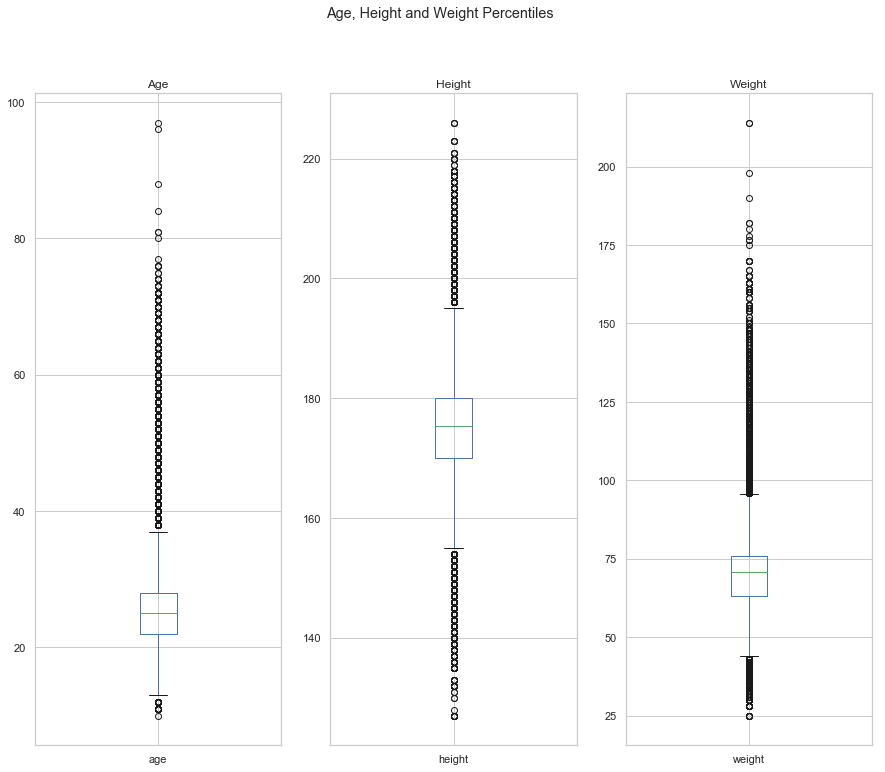

In [10]:
sns.set(style="whitegrid")

fig, axarr = plt.subplots(1, 3, figsize=(15, 12))
plt.suptitle('Age, Height and Weight Percentiles')

dataset['age'].plot.box(ax=axarr[0]).set_title('Age')
dataset['height'].plot.box(ax=axarr[1]).set_title('Height')
dataset['weight'].plot.box(ax=axarr[2]).set_title('Weight')

<h1>Investigating the funny stuff</h1>
<p> Which athlete was the youngest to ever compete? <br>
Which athlete was the oldest to ever compete? </p>

In [11]:
youngest_athletes = dataset.sort_values(by='age', ascending=True)
youngest_athletes.head(1)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
142882,71691,Dimitrios Loundras,M,10.0,175.338953,70.701778,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


<h1>About the youngest athlete</h1>

In [12]:
HTML('''
<style>

table p {
    font-size:15px;
}
table img {
    min-width: 150px;
}
</style>
''')

<table class="" border="1">
<tbody>
<tr>
<td>
<img  alt="webi" src="/img/dmitri-loundras.jpg" 
 />                               
</td>
<td style="margin-left:50px; white-space: nowrap; width:100px;overflow: hidden; position:relative; vertical-align:top; padding:50px;">
    <p>Dimitrios Loundras (6 September 1885 - 15 February 1971) was a Greek gymnast and naval officer who competed at the 1896 Summer Olympics in Athens. He was the last surviving participant of these Games.

Loundras competed in the team parallel bars event. In that competition, Loundras was a member of the Ethnikos Gymnastikos Syllogos team that placed third of the three teams in the event, giving him a bronze medal. At 10 years 218 days he remains the youngest medalist and competitor in Olympic history, if one discounts an unknown competitor, believed to be a seven-year-old French boy, who competed as coxswain for the Dutch coxed pair rowing team in the 1900 Olympics.</p>
 </td>
</tr>
</tbody>
</table>

In [13]:
oldest_athletes = dataset.sort_values(by='age', ascending=False)
oldest_athletes.head(1)

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
257054,128719,John Quincy Adams Ward,M,97.0,175.338953,70.701778,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


<h1>About the oldest athlete</h1>

<table class="" border="1">
<tbody>
<tr>
<td>
<img  alt="webi" src="/img/220px-John_Quincy_Adams_Ward,_circa_1900.jpg" 
 />                               
</td>
<td style="margin-left:50px; white-space: nowrap; width:100px;overflow: hidden; position:relative; vertical-align:top;">
    <p>John Quincy Adams Ward (June 29, 1830 – May 1, 1910) was an American sculptor, who may be most familiar for his larger than lifesize standing statue of George Washington on the steps of Federal Hall National Memorial in New York City.<br><br>
    Ward participated in numerous organizations and associations during his long career. He was a founder and president of the National Sculpture Society (1893–1905), president of the National Academy of Design (1874), and a member of the Fine Arts Federation, the Architectural League, the National Institute of Arts and Letters, the American Academy of Arts and Letters, The American Institute of Architects, the National Arts Club, and the Century Association. He sat on the Advisory Committee of Fine Arts of the City of New York at the World's Columbian Exposition of 1893 and on the Advisory Committee of Sculptors at the Louisiana Purchase Exposition in 1904. He was one of the original members of the Board of Trustees of The Metropolitan Museum of Art and served on its Executive Committee until 1901, as well as one of the first trustees in 1897 for the American Academy in Rome.</p>
 </td>
</tr>
</tbody>
</table>

<h1>What makes a winner?</h1>
<p>When we ask the question: "What makes a winner?"</p>
<p>We have to take into account: Sex, Age, Sport, Event and at last, can a bronze or silver medal be considered a winner?</p>
<h3>For the sake of my time only the 7 most participated types of Sports are gonna be analysed</h3>

In [14]:
# A bit of cleaning, the "games" column already expresses what is being said in the "year" and "season" column.
dataset = dataset.drop("games", axis=1)

In [15]:
print(dataset["sport"].unique())
print(dataset["sport"].value_counts())

['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']
Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting               

<h3> Male Analysis </h3>

Athletics Age


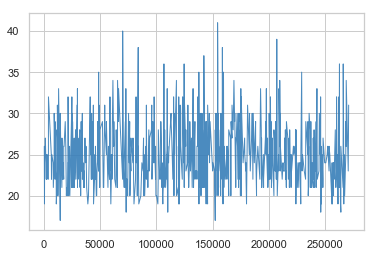

Gymnastics Age


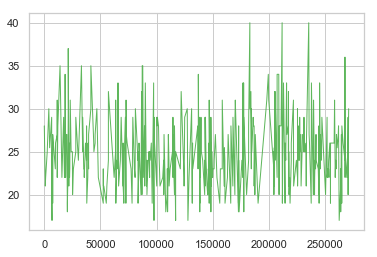

Swimming Age


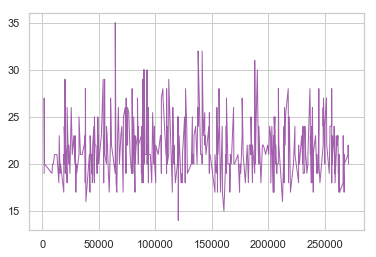

Shooting Age


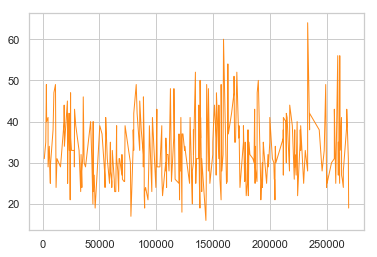

Cycling Age


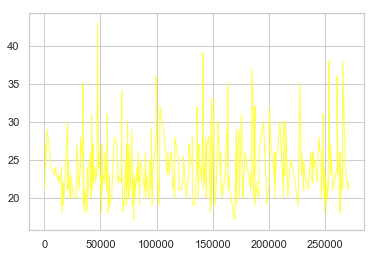

Fencing Age


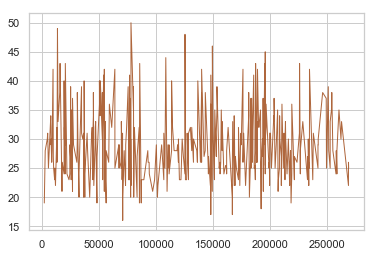

Rowing Age


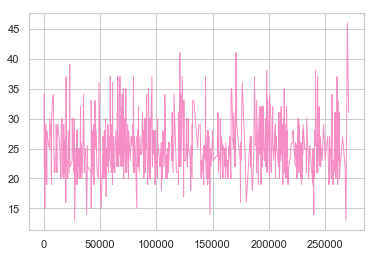

In [57]:
types_sports = dataset["sport"].value_counts().index.tolist()
types_sports = types_sports[:7]
num = 0
palette = plt.get_cmap('Set1')

for type_sport in types_sports:
    print(type_sport, "Age")
    new_df = dataset.loc[(dataset["sport"] == type_sport) & (dataset["sex"] == "M") & (dataset["medal"] == "Gold")]
    num+=1
    plt.plot(new_df['age'], marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
    plt.show()



(269731,)
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]
[3.70739737e-06 7.41479474e-06 1.11221921e-05 ... 9.99992585e-01
 9.99996293e-01 1.00000000e+00]


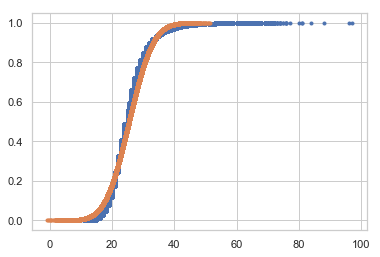

In [17]:
mu = np.mean(dataset['age'])
sigma = np.std(dataset['age'])
shape = dataset['age'].shape
print(shape)
testing_set = np.random.normal(mu, sigma, shape[0])
x_text, y_test = ecdf(testing_set)
x_text, y_test = ecdf(testing_set)
x, y = ecdf(dataset['age'])
plt.plot(x, y, linestyle='none', marker='.')
plt.plot(x_text, y_test, linestyle='none', marker='.')

In [18]:
dataset.isnull().sum()

id             0
name           0
sex            0
age            0
height         0
weight         0
team           0
noc            0
year           0
season         0
city           0
sport          0
event          0
medal     229959
dtype: int64

In [19]:
print('Number of rows: ' + str(dataset.shape[0]))
print('Number of columns: ' + str(dataset.shape[1]))

Number of rows: 269731
Number of columns: 14


<h1> Frequency of Country Participation and Sport Activity </h1>

In [20]:
dataset.noc.value_counts(dropna=False).head()

USA    18604
FRA    12551
GBR    12115
ITA    10668
GER     9734
Name: noc, dtype: int64

In [21]:
dataset.sport.value_counts(dropna=False).head()

Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10827
Name: sport, dtype: int64

<h1>Tidy Data</h1>

In [22]:
athlete_df = dataset[['name', 'team', 'noc']]

athlete_df = pd.melt(frame=athlete_df, id_vars='name', value_vars=['team', 'noc'], var_name='type', value_name='result')
athlete_df.head(5)

,name,type,result
0,A Dijiang,team,China
1,A Lamusi,team,China
2,Gunnar Nielsen Aaby,team,Denmark
3,Edgar Lindenau Aabye,team,Denmark/Sweden
4,Christine Jacoba Aaftink,team,Netherlands
